In [93]:
import pandas as pd
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import joblib

In [94]:
df= pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [95]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [96]:
df.shape

(301, 9)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [98]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [99]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [100]:
df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [101]:
date_time=datetime.datetime.now()

In [102]:
print(date_time)

2024-06-18 15:47:23.848701


In [103]:
df['Age']=date_time.year - df['Year']

In [104]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [105]:

df.drop('Year',axis=1,inplace=True)

<Axes: >

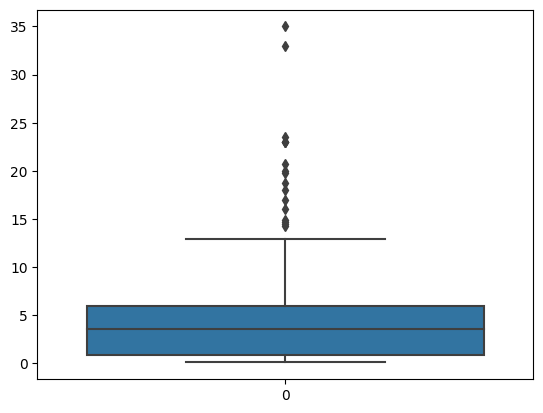

In [106]:
sns.boxplot(df['Selling_Price'])

In [107]:
sorted(df['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [108]:
df=df[~(df['Selling_Price']>=33.0) & (df['Selling_Price']<=35.0)]

In [109]:
df.shape

(299, 9)

In [144]:
df.head()  

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [111]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [112]:
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

C:\Users\Swastik Shetty\AppData\Local\Temp\ipykernel_4292\3075780004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})


In [113]:
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [114]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [115]:
df['Selling_type']=df['Selling_type'].map({'Dealer':0, 'Individual':1})

C:\Users\Swastik Shetty\AppData\Local\Temp\ipykernel_4292\1005751034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Selling_type']=df['Selling_type'].map({'Dealer':0, 'Individual':1})


In [116]:
df['Selling_type'].unique()

array([0, 1], dtype=int64)

In [117]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [118]:
df['Transmission']=df['Transmission'].map({'Manual':0, 'Automatic':1})

C:\Users\Swastik Shetty\AppData\Local\Temp\ipykernel_4292\3461262693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission']=df['Transmission'].map({'Manual':0, 'Automatic':1})


In [119]:
df['Transmission'].unique()

array([0, 1], dtype=int64)

In [120]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [121]:
X= df.drop(['Car_Name','Selling_Price'],axis=1)
y= df['Selling_Price']

In [122]:
X

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,8
297,5.90,60000,0,0,0,0,9
298,11.00,87934,0,0,0,0,15
299,12.50,9000,1,0,0,0,7


In [123]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [126]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [127]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [128]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

In [129]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

score1,score2,score3,score4

(0.6784776215585442,
 0.7376758159705559,
 0.8668886790543577,
 0.8743449962017417)

In [130]:
model_prediction= pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                              "R2_Score":[score1,score2,score3,score4]}) 
model_prediction

,Models,R2_Score
0,LR,0.678478
1,RF,0.737676
2,GBR,0.866889
3,XG,0.874345


<Axes: xlabel='Models', ylabel='R2_Score'>

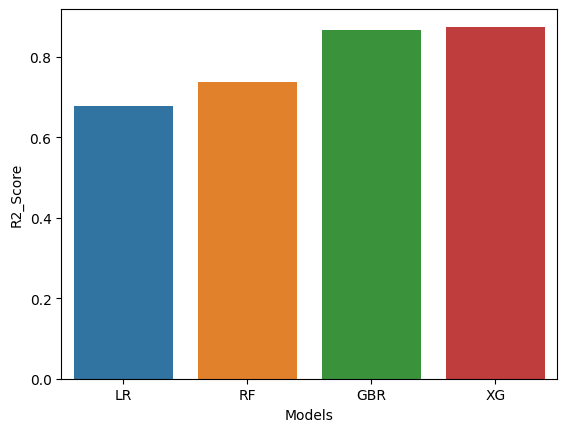

In [131]:
sns.barplot(x=model_prediction['Models'],y=model_prediction['R2_Score'])

In [132]:
xg = XGBRegressor()
final_model = xg.fit(X,y)

In [134]:
joblib.dump(final_model,'Car_Price_Predictor')

['Car_Price_Predictor']

In [135]:
model=joblib.load('Car_Price_Predictor')

In [145]:
df.head(2)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11


In [137]:
data = pd.DataFrame({
    
    'Present_Price': 9.54 ,
    'Driven_kms': 43000,
    'Fuel_Type': 1,
    'Selling_type': 0,
    'Transmission': 0,
    'Owner': 0,
    'Age': 11
},index=[0])

In [138]:
model.predict(data)

array([4.771689], dtype=float32)

In [143]:
from tkinter import *


def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    
    
    model = joblib.load('Car_Price_Predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Driven_kms':p2,
    'Fuel_Type':p3,
    'Selling_type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Driven_kms").grid(row=2)
Label(master, text="Fuel_Type (Petrol:0,Diesel:1,CNG:2)").grid(row=3)
Label(master, text="Selling_type(Dealer:0,individual:1)").grid(row=4)
Label(master, text="Transmission(manual:0, automatic:1)").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()